In [0]:
import json

def decode_predictions(preds, top=5, class_list_path='../input/resnet50/imagenet_class_index.json'):
  """Decodes the prediction of an ImageNet model.
  Arguments:
      preds: Numpy tensor encoding a batch of predictions.
      top: integer, how many top-guesses to return.
      class_list_path: Path to the canonical imagenet_class_index.json file
  Returns:
      A list of lists of top class prediction tuples
      `(class_name, class_description, score)`.
      One list of tuples per sample in batch input.
  Raises:
      ValueError: in case of invalid shape of the `pred` array
          (must be 2D).
  """
  if len(preds.shape) != 2 or preds.shape[1] != 1000:
    raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
  CLASS_INDEX = json.load(open(class_list_path))
  results = []
  for pred in preds:
    top_indices = pred.argsort()[-top:][::-1]
    result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
    result.sort(key=lambda x: x[2], reverse=True)
    results.append(result)
  return results

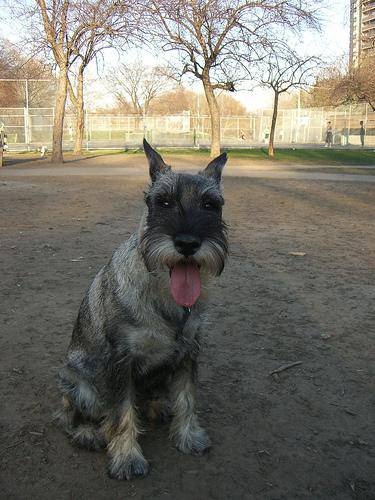

[('n02097209', 'standard_schnauzer', 0.5650234), ('n02097047', 'miniature_schnauzer', 0.3131986), ('n02097130', 'giant_schnauzer', 0.04519444)]


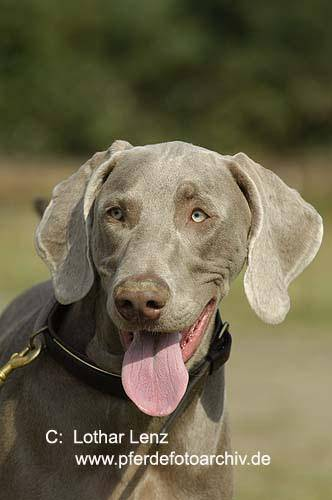

[('n02092339', 'Weimaraner', 0.9976726), ('n02099849', 'Chesapeake_Bay_retriever', 0.0013928412), ('n02109047', 'Great_Dane', 0.00032280292)]


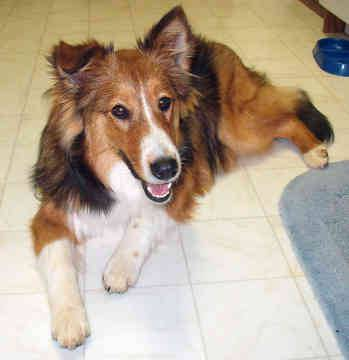

[('n02105855', 'Shetland_sheepdog', 0.9133908), ('n02106030', 'collie', 0.08145218), ('n02105056', 'groenendael', 0.0010965336)]


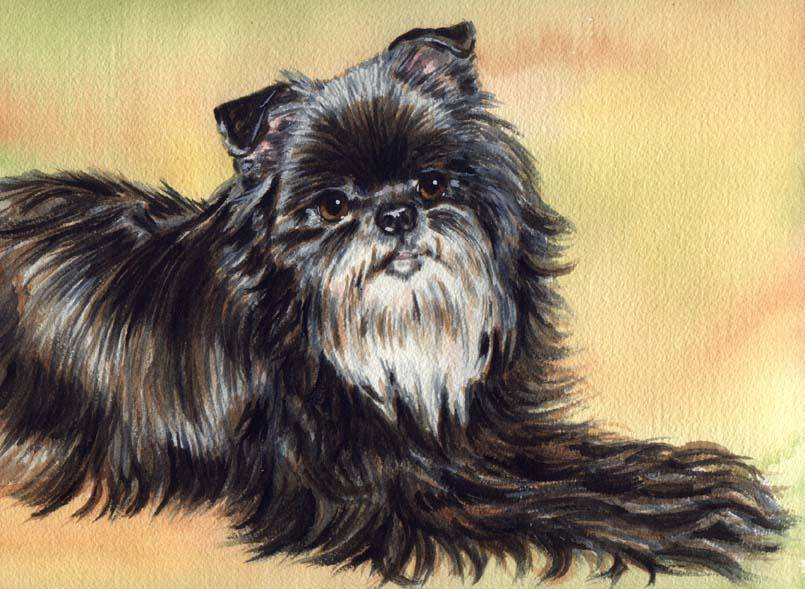

[('n02110627', 'affenpinscher', 0.9366859), ('n02112706', 'Brabancon_griffon', 0.03435966), ('n02086240', 'Shih-Tzu', 0.011122933)]


In [9]:
from os.path import join

image_dir = ''
img_paths = [join(image_dir, filename) for filename in 
                           ['0246f44bb123ce3f91c939861eb97fb7.jpg',
                            '84728e78632c0910a69d33f82e62638c.jpg',
                            '8825e914555803f4c67b26593c9d5aff.jpg',
                            '91a5e8db15bccfb6cfa2df5e8b95ec03.jpg']]


import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)


from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])